# Mod 5 Project

## 1. EDA

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("darkgrid", {"axes.facecolor": ".9"})

In [2]:
df = pd.read_excel('default of credit card clients.xls', skiprows = 1)

|Name |	Description |
|-----------|-------------|
|ID	|ID of each client|
|limit_balance| 	Amount of given credit in NT dollars (includes individual and family/supplementary credit)|
|sex|	Gender (1=male, 2=female)|
|education|	(1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)|
|marriage	|Marital status (1=married, 2=single, 3=others)|
|age|	Age in years|
|pay_stat_sep|	Repayment status in September, 2005 (-2=no consumption, -1=pay duly, 0=the use of revolving credit, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)|
|pay_stat_aug	|Repayment status in August, 2005 (scale same as above)|
|pay_stat_jul	|Repayment status in July, 2005 (scale same as above)|
|pay_stat_jun	|Repayment status in June, 2005 (scale same as above)|
|pay_stat_may	|Repayment status in May, 2005 (scale same as above)|
|pay_stat_apr	|Repayment status in April, 2005 (scale same as above)|
|bill_amt_sep	|Amount of bill statement in September, 2005 (NT dollar)|
|bill_amt_aug	|Amount of bill statement in August, 2005 (NT dollar)|
|bill_amt_jul	|Amount of bill statement in July, 2005 (NT dollar)|
|bill_amt_jun	|Amount of bill statement in June, 2005 (NT dollar)|
|bill_amt_may	|Amount of bill statement in May, 2005 (NT dollar)|
|bill_amt_apr	|Amount of bill statement in April, 2005 (NT dollar)|
|pay_amt_sep	|Amount of previous payment in September, 2005 (NT dollar)|
|pay_amt_aug	|Amount of previous payment in August, 2005 (NT dollar)|
|pay_amt_jul	|Amount of previous payment in July, 2005 (NT dollar)|
|pay_amt_jun	|Amount of previous payment in June, 2005 (NT dollar)|
|pay_amt_may	|Amount of previous payment in May, 2005 (NT dollar)|
|pay_amt_apr	|Amount of previous payment in April, 2005 (NT dollar)|
|default_next_month	|Default payment (1=yes, 0=no)|

In [3]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [4]:
new_column_names = ['ID', 'limit_balance', 'sex', 'education', 'marriage', 'age', 'pay_status_sep', 
                   'pay_status_aug', 'pay_status_jul', 'pay_status_jun', 'pay_status_may',
                   'pay_status_apr', 'bill_amt_sep', 'bill_amt_aug', 'bill_amt_jul', 'bill_amt_jun',
                   'bill_amt_may', 'bill_amt_apr', 'pay_amt_sep', 'pay_amt_aug', 'pay_amt_jul',
                    'pay_amt_jun', 'pay_amt_may', 'pay_amt_apr', 'default_next_month']

df.columns = new_column_names

In [5]:
df.drop(columns = 'ID', inplace = True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
limit_balance         30000 non-null int64
sex                   30000 non-null int64
education             30000 non-null int64
marriage              30000 non-null int64
age                   30000 non-null int64
pay_status_sep        30000 non-null int64
pay_status_aug        30000 non-null int64
pay_status_jul        30000 non-null int64
pay_status_jun        30000 non-null int64
pay_status_may        30000 non-null int64
pay_status_apr        30000 non-null int64
bill_amt_sep          30000 non-null int64
bill_amt_aug          30000 non-null int64
bill_amt_jul          30000 non-null int64
bill_amt_jun          30000 non-null int64
bill_amt_may          30000 non-null int64
bill_amt_apr          30000 non-null int64
pay_amt_sep           30000 non-null int64
pay_amt_aug           30000 non-null int64
pay_amt_jul           30000 non-null int64
pay_amt_jun           30000 non

## Inspecting Each Category

### 1.1 Limit Balance

count      30000.000000
mean      167484.322667
std       129747.661567
min        10000.000000
25%        50000.000000
50%       140000.000000
75%       240000.000000
max      1000000.000000
Name: limit_balance, dtype: float64

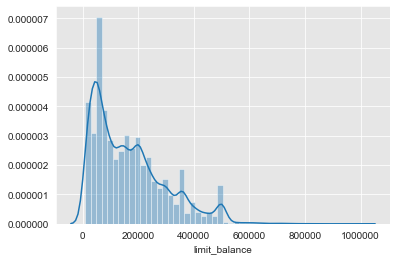

In [7]:
display(df.limit_balance.describe())
sns.distplot(df.limit_balance)

#### 1.1.1 How limit balance differs for defaulters vs non defaulters

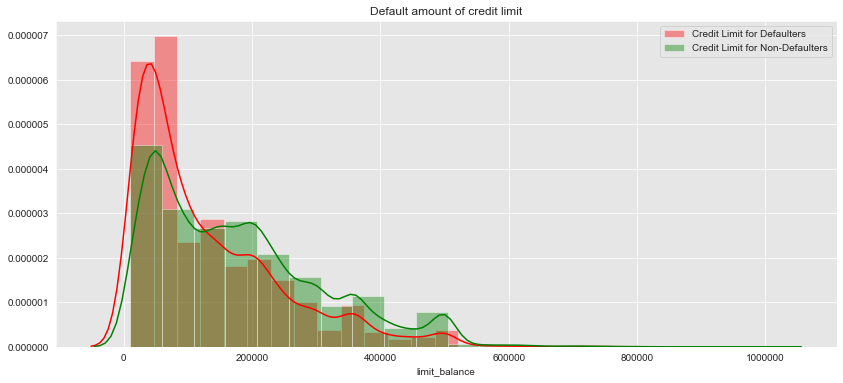

In [8]:
no_def_limit_bal = df.loc[df['default_next_month'] == 0]["limit_balance"]
def_limit_bal = df.loc[df['default_next_month'] == 1]["limit_balance"]
plt.figure(figsize = (14,6))
plt.title('Default amount of credit limit')
sns.set_color_codes("pastel")
sns.distplot(def_limit_bal,kde=True,bins=20, color="red", label = 'Credit Limit for Defaulters')
sns.distplot(no_def_limit_bal,kde=True,bins=20, color="green", label = 'Credit Limit for Non-Defaulters')
plt.legend()
plt.show();
# those who default appear to be more densely populated at lower credit limits


### 1.2 Sex

In [9]:
display(df.sex.value_counts())

demo = list((df.sex.value_counts(normalize = True)))
print('The dataset consists of {}% male and {}% female'.format(round(100*demo[0], 2), round(100*demo[1], 2)))

df.sex.replace({2: 'female', 1: 'male'}, inplace = True)

# Everything seems to be in order with sex. more females
# Could correct for the imbalance with synthetic minority oversampling technique

2    18112
1    11888
Name: sex, dtype: int64

The dataset consists of 60.37% male and 39.63% female


#### 1.2.1 Does default risk differ amongst genders?

In [10]:
fem_def_perc = (len((df.loc[(df['sex'] == 'female') & (df['default_next_month'] == 1)]))/(len(df.loc[df['sex'] == 'female'])))
mal_def_perc = (len((df.loc[(df['sex'] == 'male') & (df['default_next_month'] == 1)]))/(len(df.loc[df['sex'] == 'male'])))

print("Male default rate is {}".format(round(mal_def_perc, 2)), '\n\n'
      "Female default rate is {}".format(round(fem_def_perc, 2)))

Male default rate is 0.24 

Female default rate is 0.21


In [11]:
# visualising this with a bar chart
fem_default = df.loc[(df['sex'] == 'female') & (df['default_next_month'] == 1)]
fem_df = df.loc[df['sex'] == 'female']

mal_default = df.loc[(df['sex'] == 'male') & (df['default_next_month'] == 1)]
fem_df = df.loc[df['sex'] == 'male']





In [12]:
# Getting dummies for sex
df = pd.get_dummies(df, columns = ['sex'])

### 1.3 Education

In [13]:
display(df.education.value_counts())
# seems to be education values that are outside the domain of the description
# 5,6 are not defined. Will change these values to graduate school on the assumption that higher numbers
# mean more education.
# changing the non-defined education values to median value of 2 meaning university
median_edu = int(df.education.median())
print("Median level of education is {}".format(median_edu))

df.education.replace({5: median_edu, 6:median_edu, 0:median_edu}, inplace = True)

df.education.value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: education, dtype: int64

Median level of education is 2


2    14375
1    10585
3     4917
4      123
Name: education, dtype: int64

#### 1.3.1 Does default rate differ by education level?

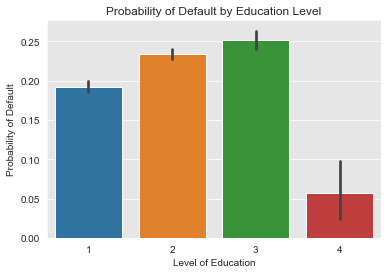

In [14]:
sns.barplot(x="education", y = 'default_next_month', data = df)
plt.xlabel('Level of Education')
plt.ylabel('Probability of Default')
plt.title("Probability of Default by Education Level");

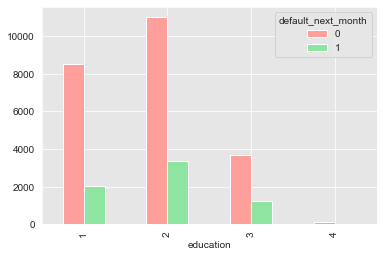

In [15]:
education_groupby = pd.DataFrame(df.groupby(['education', 'default_next_month']).size().unstack())
education_groupby.plot(kind = 'bar', color = 'rg');

In [16]:
# it appears that the probability of default is highest among university graduates,
# and lowest amongst graduate education

In [17]:
# Converting education to a dummy variable
df = pd.get_dummies(df, columns = ['education'])

### 1.4 Marriage

In [18]:
display(df.marriage.value_counts())
# seems to be 54 0 values, will change these to 3 (others)
df.marriage.replace({0:3}, inplace = True)
display(df.marriage.value_counts())

2    15964
1    13659
3      323
0       54
Name: marriage, dtype: int64

2    15964
1    13659
3      377
Name: marriage, dtype: int64

#### 1.4.1 Does default risk differ amongst married people

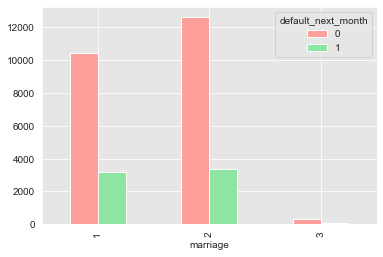

In [19]:
marriage_groupby = pd.DataFrame(df.groupby(['marriage', 'default_next_month']).size().unstack())
marriage_groupby.plot(kind = 'bar', color = 'rg');



In [20]:
# getting dummies for marriage
df = pd.get_dummies(df, columns = ['marriage'])

### 5. Age

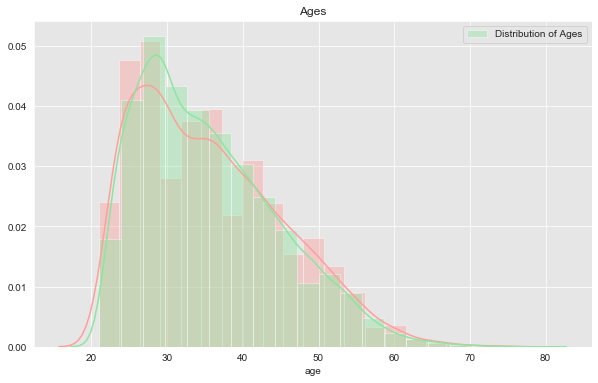

In [21]:
plt.figure(figsize = (10, 6))
sns.distplot(df.loc[df['default_next_month'] == 1].age, bins = 20, color = 'r')
sns.distplot(df.age, bins = 20, label = 'Distribution of Ages', color = 'g')
plt.title('Ages')
plt.legend()
plt.show();

<Figure size 432x1440 with 0 Axes>

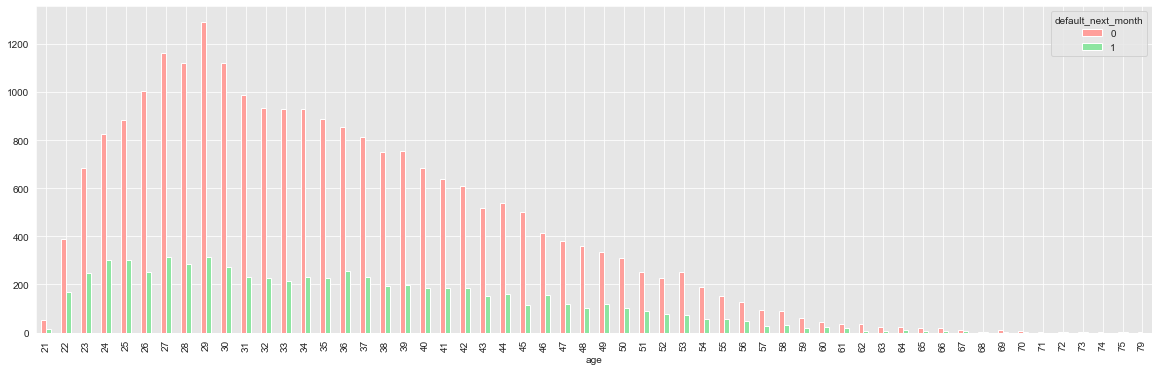

In [22]:
plt.figure(figsize = (6,20))
age_groupby = pd.DataFrame(df.groupby(['age', 'default_next_month']).size().unstack())
age_groupby.plot(kind = 'bar', color = 'rg', figsize = (20,6));

In [23]:
# young people and middle age tend to default a lot

#### 5.1 Does Credit Default Risk differ amongst ages?

In [24]:
# Looks like the distribution plots are very similar, perhaps, slightly higher probability of default as 
# individuals get older than 42, and lower probability of default between ages 25-40
# this could be a reason to use bins for age, and use it as categorical?

### 6. Target Variable: Default_next_month

In [25]:
no_default, default = list(df.default_next_month.value_counts())
print("Total amount of people that have defaulted: {}".format(default),'\n\n',
      "Total amount of people that have not defaulted: {}".format(no_default))
# seems to be a large class imbalanace here, will have to use sampling techniques to correct for this

Total amount of people that have defaulted: 6636 

 Total amount of people that have not defaulted: 23364


## Inspecting Feature Correlation

### 1. Pay Status

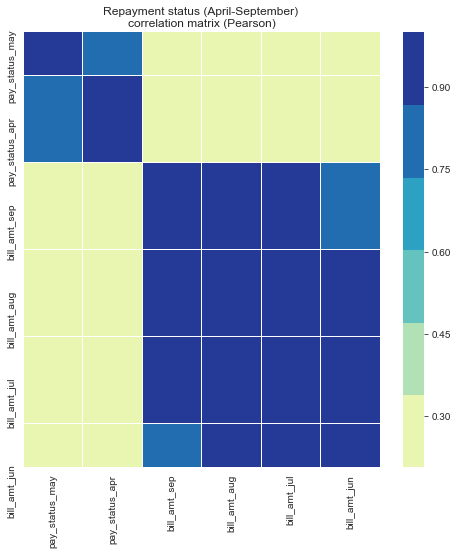

In [26]:
var = df.columns[6:12]

plt.figure(figsize = (8,8))
plt.title('Repayment status (April-September) \ncorrelation matrix (Pearson)')
corr = df[var].corr()
cmap = sns.color_palette("YlGnBu")
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.1, cmap=cmap)
plt.show()
# Correlation seems to be falling the further away months are
# payment status in september is highly correlated to august
# but correlation falls when looking at september to april

In [27]:
# Changing pay status to dummy variables
features = ['pay_status_sep', 'pay_status_aug', 'pay_status_jul', 'pay_status_jun', 'pay_status_may',
            'pay_status_apr']
df = pd.get_dummies(df, columns = features)
df.head(1)

,limit_balance,age,bill_amt_sep,bill_amt_aug,bill_amt_jul,bill_amt_jun,bill_amt_may,bill_amt_apr,pay_amt_sep,pay_amt_aug,...,pay_status_apr_-2,pay_status_apr_-1,pay_status_apr_0,pay_status_apr_2,pay_status_apr_3,pay_status_apr_4,pay_status_apr_5,pay_status_apr_6,pay_status_apr_7,pay_status_apr_8
0,20000,24,3913,3102,689,0,0,0,0,689,...,1,0,0,0,0,0,0,0,0,0


In [28]:
# now have 83 columns after getting dummies for payment status

### 2. Bill Amount

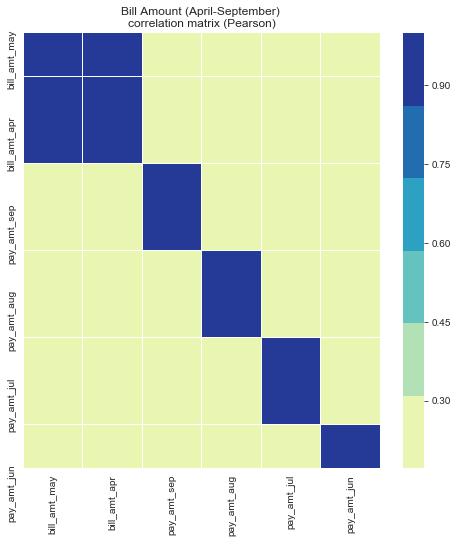

In [29]:
var = df.columns[6:12]

plt.figure(figsize = (8,8))
plt.title('Bill Amount (April-September) \ncorrelation matrix (Pearson)')
corr = df[var].corr()
cmap = sns.color_palette("YlGnBu")
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.1, cmap=cmap)
plt.show();
# Again, high correlation for months that are close to one another


### 3. Pay Amount

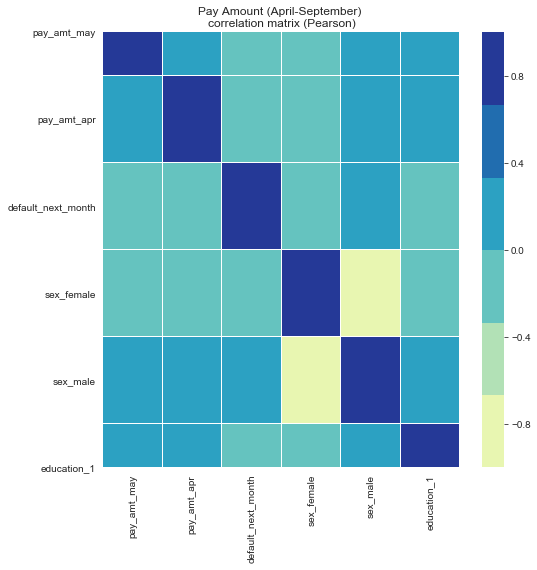

In [30]:
var = df.columns[12:18]

plt.figure(figsize = (8,8))
plt.title('Pay Amount (April-September) \ncorrelation matrix (Pearson)')
corr = df[var].corr()
cmap = sns.color_palette("YlGnBu")
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.1, cmap=cmap)
plt.show()
# Very low correlation between payment amounts across months

### Reducing Computational Power 

In [42]:
# struggling to fit some models due to so many columns, 
for col in df.columns:
    if 'jul' in col:
        del df[col]
    elif 'jun' in col:
        del df[col]
    elif 'may' in col:
        del df[col]
    elif 'apr' in col:
        del df[col]

In [43]:
df.shape

(30000, 38)

In [44]:
df.columns

Index(['limit_balance', 'age', 'bill_amt_sep', 'bill_amt_aug', 'pay_amt_sep',
       'pay_amt_aug', 'default_next_month', 'sex_female', 'sex_male',
       'education_1', 'education_2', 'education_3', 'education_4',
       'marriage_1', 'marriage_2', 'marriage_3', 'pay_status_sep_-2',
       'pay_status_sep_-1', 'pay_status_sep_0', 'pay_status_sep_1',
       'pay_status_sep_2', 'pay_status_sep_3', 'pay_status_sep_4',
       'pay_status_sep_5', 'pay_status_sep_6', 'pay_status_sep_7',
       'pay_status_sep_8', 'pay_status_aug_-2', 'pay_status_aug_-1',
       'pay_status_aug_0', 'pay_status_aug_1', 'pay_status_aug_2',
       'pay_status_aug_3', 'pay_status_aug_4', 'pay_status_aug_5',
       'pay_status_aug_6', 'pay_status_aug_7', 'pay_status_aug_8'],
      dtype='object')

In [45]:
df.to_csv('final.csv')